In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path_to_csv = "~/ecg_af/out/exams_info.csv"
ids_col = "id_exam"
class_col = "exam_class"
age_col = "age"

In [3]:
# Get csv data
df = pd.read_csv(path_to_csv, index_col=ids_col)
df.head()

,Unnamed: 0,id_patient,age,sex,1dAVb,RBBB,LBBB,SB,AF,ST,date_exam,group_exam,exam_class,time_to_first_appearance,time_to_last_exam,split
id_exam,,,,,,,,,,,,,,,,
2111789,1776613,1372330,55,M,0,0,0,0,0,0,2017-06-02,1,0,0,0,none
2111102,1776403,1580011,57,M,0,0,0,0,0,0,2017-06-02,1,0,0,0,none
2111069,1776395,819200,82,F,0,0,0,0,1,0,2017-06-02,2,2,0,0,train
2111070,1776396,158514,52,F,0,0,0,0,0,0,2017-06-02,1,0,0,0,none
2111074,1776397,652452,38,M,0,0,0,0,0,0,2017-06-02,1,0,0,0,none


In [4]:
visits_df = pd.DataFrame(df['id_patient'])

In [5]:
visits_df.head()

,id_patient
id_exam,
2111789,1372330
2111102,1580011
2111069,819200
2111070,158514
2111074,652452


df.groupby('PatientId').size().value_counts().reset_index().rename(columns={'index':'Aid',0:'Pid'})

In [6]:
visits_count = visits_df.groupby(['id_patient'], sort=False).size().reset_index().rename(columns={0:'counts'})

In [7]:
visits_count.head()

,id_patient,counts
0,1372330,2
1,1580011,2
2,819200,3
3,158514,8
4,652452,2


<function matplotlib.pyplot.show(close=None, block=None)>

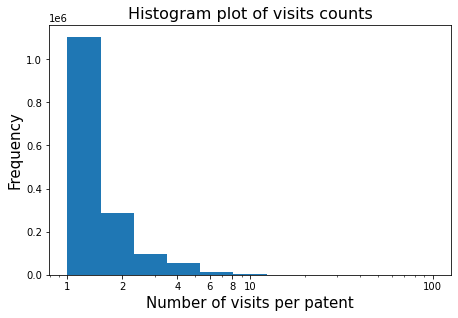

In [8]:
# Plotting the number of visits per patients

ax = visits_count['counts'].plot.hist(bins=np.logspace(0, 2, 12), figsize=(7.2, 4.6))
ax.set(xscale='log',)
ax.set(xticks=[1, 2, 4, 6, 8, 10, 100])
ax.set_xticklabels(['1', '2', '4', '6', '8', '10', '100'])
ax.set_title("Histogram plot of visits counts", fontsize = 16)
ax.set_xlabel('Number of visits per patent', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)
#plt.savefig('visits_counts.png')
plt.show

In [9]:
#visits_count['counts'].value_counts()

In [10]:
patients_ages = pd.DataFrame(df[age_col])

<function matplotlib.pyplot.show(close=None, block=None)>

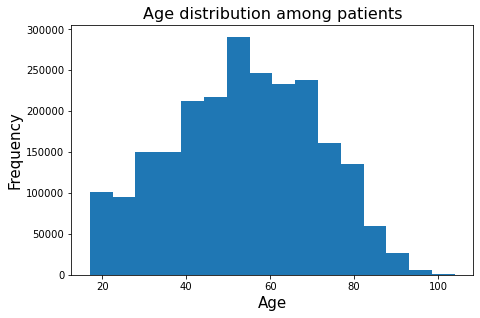

In [11]:
# Plotting age distribution

ax1 = patients_ages[age_col].plot.hist(bins=16, figsize=(7.2, 4.6))
#ax1.set(xscale='log',)
#ax1.set(xticks=[20, 30, 40, 50, 60, 70, 80, 90, 100])
#ax1.set_xticklabels(['20', '30', '40', '50', '60', '70','80','90', '100'])
ax1.set_title("Age distribution among patients", fontsize = 16)
ax1.set_xlabel('Age', fontsize = 15)
ax1.set_ylabel('Frequency', fontsize = 15)
#plt.savefig('age_distribution.png')
plt.show

In [12]:
df['sex'].value_counts()

F    1399701
M     922764
Name: sex, dtype: int64

In [13]:
# Counts for female and male for classes 1, 2 and 3

df.loc[df[class_col]!= 0, 'sex'].value_counts()

F    426061
M    265584
Name: sex, dtype: int64

In [14]:
# classes 1 to 3, & sex distribution
class_sex_df = df.loc[df[class_col]!= 0, [class_col, 'sex']]

In [15]:
class_sex_count= class_sex_df.groupby([class_col, 'sex']).size().reset_index().rename(columns={0:'counts'})

In [16]:
class_sex_df.head()

,exam_class,sex
id_exam,,
2111069,2,F
2111509,2,M
2111357,2,F
2111409,2,M
2110479,2,M


In [17]:
class_sex_count

,exam_class,sex,counts
0,1,F,400788
1,1,M,236726
2,2,F,19206
3,2,M,22645
4,3,F,6067
5,3,M,6213


In [18]:
males_counts = tuple(class_sex_count.loc[class_sex_count['sex']=='M', 'counts'])
females_counts = tuple(class_sex_count.loc[class_sex_count['sex']!='M', 'counts'])
index = np.array(class_sex_count[class_col].unique())  # the x locations for the classes
width = 0.35       # the width of the bars

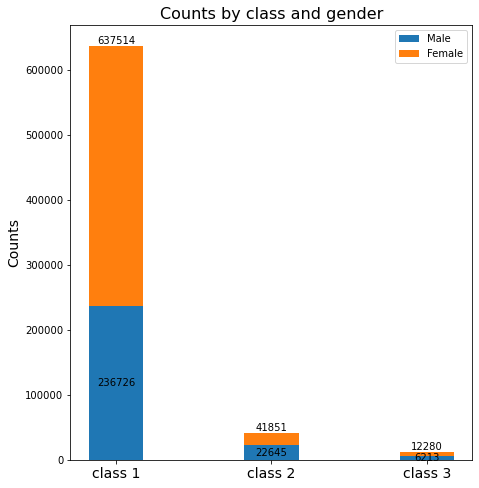

In [19]:
fig, ax2 = plt.subplots(figsize=(7.2, 8))

p1 = ax2.bar(index, males_counts, width, label='Male')
p2 = ax2.bar(index, females_counts, width, bottom=males_counts, label='Female')

#ax2.axhline(0, color='grey', linewidth=0.8)
ax2.set_ylabel('Counts', fontsize = 14)
ax2.set_title('Counts by class and gender', fontsize = 16)
ax2.set_xticks(index, labels=['class 1', 'class 2', 'class 3'], fontsize = 14)
ax2.legend()

# Label with label_type 'center' instead of the default 'edge'
ax2.bar_label(p1, label_type='center')
#ax2.bar_label(p2, label_type='center')
ax2.bar_label(p2)
plt.savefig('class_n_sex.png')

plt.show()

In [20]:
# Classes distribution

classes = df[class_col]
classes_count = classes.value_counts()
classes_count

0    1630820
1     637514
2      41851
3      12280
Name: exam_class, dtype: int64

In [21]:
df_classes = pd.DataFrame(data=classes_count.values,  columns=['counts'], index=['Class 0','Class 1','Class 2','Class 3'])
# add a percent column
df_classes['%'] = df_classes.counts.div(df_classes.counts.sum()).mul(100).round(2)
display(df_classes)

,counts,%
Class 0,1630820,70.22
Class 1,637514,27.45
Class 2,41851,1.80
Class 3,12280,0.53


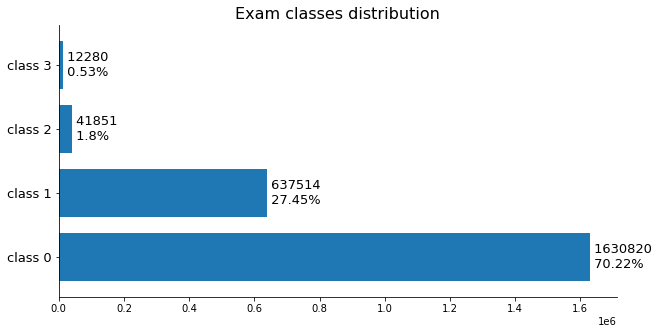

In [22]:
# Plotting the classes distribution

ax3 = df_classes.plot(kind='barh', y='counts', figsize=(10, 5), legend=False, width=.75)

# customize the label to include the percent
labels = [f' {v.get_width()}\n {df_classes.iloc[i, 1]}%' for i, v in enumerate(ax3.containers[0])]

# set the bar label
ax3.bar_label(ax3.containers[0], labels=labels, label_type='edge', size=13)
ax3.set_title('Exam classes distribution', fontsize = 16)
ax3.set_yticks([0, 1, 2, 3], labels=['class 0', 'class 1', 'class 2', 'class 3'], fontsize = 13)
ax3.set_xticks([0.0e6, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1.0e6, 1.2e6, 1.4e6, 1.6e6],fontsize = 13)

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
#plt.savefig('classes_distr.png')
plt.show()

In [23]:
print("Max time to first appearence:", max(df['time_to_first_appearance']), "weeks")
print("Max time to last exam:", max(df['time_to_last_exam']), "weeks")

Max time to first appearence: 376 weeks
Max time to last exam: 385 weeks


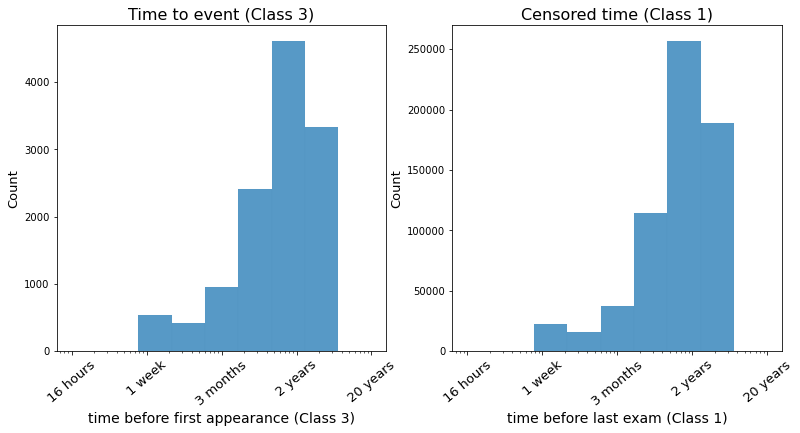

In [25]:
# Plots: Time to first appearence & Time to last exm
import seaborn as sns

# Generate plots
fig, ax4 = plt.subplots(ncols=2, figsize=[13, 6])
#sns.distplot(exams_info['time_to_first_appearance'], kde=False, norm_hist=False, bins=np.logspace(-1, 3, 10), ax=ax[0])
sns.histplot(data=df['time_to_first_appearance'], kde=False,  bins=np.logspace(-1, 3, 10), ax=ax4[0]) # or seaborn.displot
ax4[0].set(xscale='log',)
ax4[0].set(xticks=[0.1, 1, 10, 100, 1000])
ax4[0].set_xticklabels(['16 hours', '1 week', '3 months', '2 years', '20 years'], rotation=40,fontsize = 13)
ax4[0].set_title('Time to event (Class 3)',fontsize = 16)
ax4[0].set_ylabel('Count', fontsize = 13)
ax4[0].set_xlabel('time before first appearance (Class 3)', fontsize = 14)
#sns.distplot(exams_info['time_to_last_exam'], kde=False, norm_hist=False, bins=np.logspace(-1, 3, 10), ax=ax[1])
sns.histplot(data=df['time_to_last_exam'], kde=False, bins=np.logspace(-1, 3, 10), ax=ax4[1]) # 
ax4[1].set(xscale='log',)
#ax4[1].set(yscale='log',)
ax4[1].set(xticks=[0.1, 1, 10, 100, 1000])
ax4[1].set_xticklabels(['16 hours', '1 week', '3 months', '2 years', '20 years'], rotation=40,fontsize = 13)
ax4[1].set_title('Censored time (Class 1)',fontsize = 16)
ax4[1].set_ylabel('Count', fontsize = 13)
ax4[1].set_xlabel('time before last exam (Class 1)', fontsize = 14)
#plt.title('Time to event (Class 3) and Censored time (Class 1)',fontsize = 16)
#plt.savefig('time_to_event.png')
plt.show()